In [4]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('D:\Download\LP-IV-datasets\LP-IV-datasets\MNIST\mnist_train.csv')
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train = df['label'].values
x_train = df.drop('label',axis=1).values.reshape((-1,28,28,1)).astype('float32')

In [8]:
x_train = x_train/255

In [9]:
df1 = pd.read_csv('D:\Download\LP-IV-datasets\LP-IV-datasets\MNIST\mnist_test.csv')
df1

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y_test = df1['label'].values
x_test = df1.drop('label',axis=1).values.reshape((-1,28,28,1)).astype('float32')

In [12]:
x_test = x_test/255

In [13]:
model = models.Sequential([
    layers.Conv2D(28,kernel_size=(3,3),input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(200,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10,activation='softmax')
])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(x_train,y_train,epochs=10,batch_size=30)

Epoch 1/10
2000/2000 [==============================] - 63s 30ms/step - loss: 0.2011 - accuracy: 0.9401
Epoch 2/10
2000/2000 [==============================] - 61s 31ms/step - loss: 0.0858 - accuracy: 0.9742
Epoch 3/10
2000/2000 [==============================] - 64s 32ms/step - loss: 0.0610 - accuracy: 0.9807
Epoch 4/10
2000/2000 [==============================] - 59s 30ms/step - loss: 0.0482 - accuracy: 0.9848
Epoch 5/10
2000/2000 [==============================] - 38s 19ms/step - loss: 0.0370 - accuracy: 0.9880
Epoch 6/10
2000/2000 [==============================] - 45s 22ms/step - loss: 0.0325 - accuracy: 0.9891
Epoch 7/10
2000/2000 [==============================] - 39s 19ms/step - loss: 0.0261 - accuracy: 0.9910
Epoch 8/10
2000/2000 [==============================] - 39s 19ms/step - loss: 0.0257 - accuracy: 0.9914
Epoch 9/10
2000/2000 [==============================] - 38s 19ms/step - loss: 0.0223 - accuracy: 0.9922
Epoch 10/10
2000/2000 [==============================] - 39s 20m

In [17]:
loss,acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0594 - accuracy: 0.9858


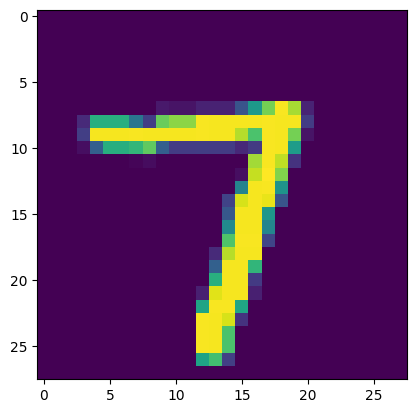

In [24]:
n = 654
image = x_train[n]
plt.imshow(image)
plt.show()

In [25]:
image = image.reshape(1,28,28,1)
predict = model.predict([image])
print("Predicted class: ")
print(np.argmax(predict))

1/1 [==============================] - 0s 21ms/step
Predicted class: 
7
